Random walks are mathematical objects in which a “walker” can move across a graph on a path determined by a random variable. We’ll use a binary random walk on a cyclic graph to test classical and quantum binary random numbers.

We’ll be simulating the random walk for the following graph:

![Cyclic Graph](Random_walks.png)

In this graph, there are 4 states: 00, 01, 10, and 11. Each state can go to two other states depending on the result of the coin toss as indicated on the arrows.

For a classical system, the coin can only have either 0 or 1 as its value. However, the quantum coin can have a superposition of 0 and 1 and will spread out more. In fact, we will find by the end of this project that the states of a quantum random walker has a greater standard deviation, that is, the quantum walker spreads out more.

Task 1: Import Libraries
Before we start the project, we’ll need to import the necessary packages. We’ll be working with the following libraries and packages:

Qiskit: This library provides quantum computing functionalities. We will use the following submodules, their purpose explained over the course of the project:

    - QuantumCircuit
    - Aer
    - execute
    - Operator
    - plot_histogram

Matplotlib: This library is used for visualization purposes. We will use the following packages:

    - Pyplot: This package will be used for creating inline plots.
Numpy: This library is used for providing mathematical functionalities.

IPython: This library provides with an interactive Python shell. We will use the following function from its display module:

    - display: This function is used to show the images.
    - clear_output: This function clears the rendered output.
time: This library is used for time-related tasks. We will use its following function:

- sleep: This function is used for add a delay in seconds.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
import numpy as np
from time import sleep

backend = AerSimulator()

# Task 2: create Quantum Circuit

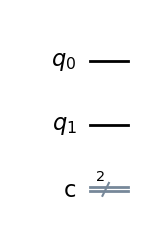

In [2]:
qc = QuantumCircuit(2, 2)
qc.draw('mpl')


# Task 3: Apply the Hadamard Gate
A Hadamard gate is used in quantum circuits to create quantum superposition. It transforms the state 
|0⟩ into (|0⟩ + |1⟩)/√2 and the state |1⟩ into (|0⟩ - |1⟩)/√2. This means that after applying a Hadamard gate, a qubit initially in state |0⟩ has an equal probability of being measured as |0⟩ or |1⟩.
​


Apply Hadamard gate to the second qubit of the circuit qc.

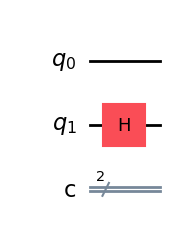

In [3]:
qc.h(1)

qc.draw('mpl')

Task 4: Create a Unitary Operator
In quantum computing, the only necessary condition for a quantum operator is that it should be unitary. This matrix is created by the following linear combination:

U = ∑i [next_state][previous_state] **T

Implement the Pauli-X gate as a unitary operator on the first qubit of qc and visualize the modified quantum circuit.

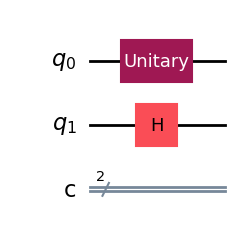

In [4]:
X_mat = [[0, 1], [1, 0]]      # Define the unitary matrix
PauliX = Operator(X_mat)      # Construct an operator using the matrix 
qc.unitary(PauliX, 0)                  # Apply the operator
qc.draw('mpl')

To obtain information from a quantum circuit, we will need to measure the qubits. In Qiskit, we can use the circuit.measure() method for this purpose.

Add measurement gates on both qubits of qc.

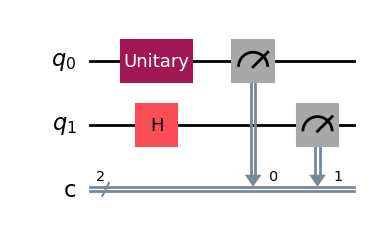

In [5]:
qc.measure(range(2), range(2))
qc.draw('mpl')

# Task 6: Simulate the Circuit
To simulate the circuit, we will need a backend simulator. Qiskit provides multiple backends for simulating quantum circuits locally.

We’ll use the Aer simulator for this project. It allows us to run the circuit for a given number of iterations and obtain a probability distribution. Each iteration is called a shot.

Qiskit also provides dedicated packages to visualize quantum states, available in the module qiskit.visualizations. We’ll use the plot_histogram() method for our project.

Your task is to:

Simulate your quantum circuit with 2048 shots.
Plot the results.

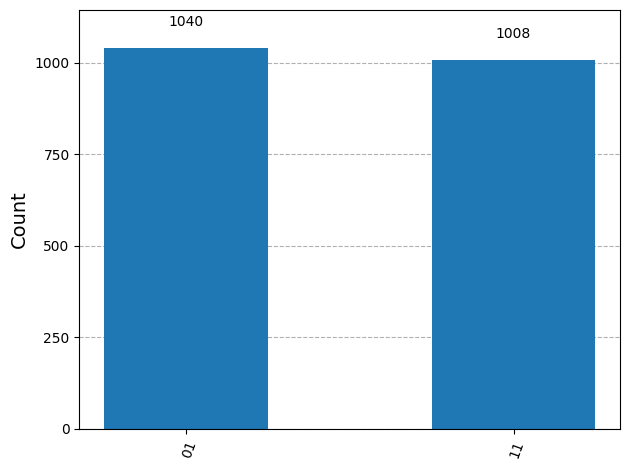

In [6]:
compiled_qc = transpile(qc, backend)
result = backend.run(compiled_qc, shots=2048).result()
counts = result.get_counts()
plot_histogram(counts)

Task 7: Create the Unitary Operator for the Walk
Construct an 8 x 8  unitary matrix for a 3-qubit system that depicts the evolution of the state according to the following graph:

![Cyclic Graph](Random_walks.png)
Assign the first qubit to the “coin toss” and the last two qubits to the state of the quantum walker.


![image.png](hint1.png)

In [7]:
# Define the unitary operator matrix
U_mat = np.zeros((8, 8))

# Set the requisite elements to 1
U_mat[0][2] = 1
U_mat[1][1] = 1
U_mat[2][4] = 1
U_mat[3][6] = 1
U_mat[4][3] = 1
U_mat[5][7] = 1
U_mat[6][0] = 1
U_mat[7][5] = 1

# Define the unitary operator
U = Operator(U_mat)

# Task 8: Create a Single-step Quantum Random Walk
Construct and simulate a quantum circuit that implements a single step of the quantum random walk. Qubit at index 0 will be used for the coin toss, while the qubits at indices 1 and 2 indicate the state of the quantum walker.

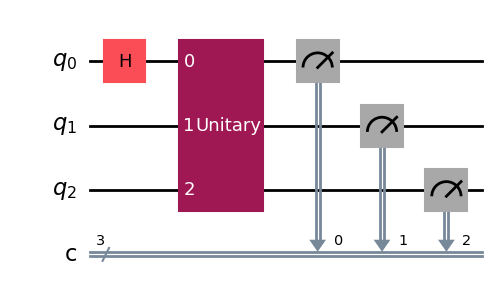

In [9]:
qrw_circ = QuantumCircuit(3, 3)

qrw_circ.h(0)
qrw_circ.unitary(U, range(3))

qrw_circ.measure(range(3), range(3))
qrw_circ.draw('mpl')

# Task 9: Extract the Walker's Information from Simulation Results
The simulation results suggest there is an extra coin qubit, which we do not need. However, we must measure it as its state affects that of the quantum walker, a phenomenon known as quantum entanglement. Thus, we’ll define a function that extracts the state of the quantum walker from the measured qubits.

Create a function dict3_to_dict2() which takes in the dictionary of simulation results and returns a dictionary of the states of the quantum random walker. We’ll need this dictionary for visualizing the state of the quantum walker using the plot_histogram() method.

In [10]:
def dict3_to_dict2(counts):
    counts_refined = {'00':0, '01':0, '10':0, '11':0}

    for count in counts:
        if count[1:3] == '00':
            counts_refined['00'] += counts[count]
        elif count[1:3] == '01':
            counts_refined['01'] += counts[count]
        elif count[1:3] == '10':
            counts_refined['10'] += counts[count]
        else:
            counts_refined['11'] += counts[count] 
    return counts_refined

# Task 10: Extract the Walker's Statevector from Simulation Results
While the dictionary created in the last step is enough for understanding the behavior of the quantum walker, we’ll need the data in a vector form for convenience with the analysis. For this reason, we will also be creating an array of the statevectors of the quantum walker as they traverse the quantum random walk.

Create a function dict3_to_state2() which takes in the dictionary of simulation results and returns the statevector of the quantum random walker.

In [11]:
def dict3_to_state2(counts):
    counts_refined = [0, 0, 0, 0]

    for count in counts:
        if count[1:3] == '00':
            counts_refined[0] += counts[count]
        elif count[1:3] == '01':
            counts_refined[1] += counts[count]
        elif count[1:3] == '10':
            counts_refined[2] += counts[count]
        else:
            counts_refined[3] += counts[count] 
    return counts_refined/np.sqrt(np.sum(np.square(counts_refined)))


# Task 11: Create the quantum_step() Function
Encapsulate the previous circuit in a function step with the following specifications:

Parameters

state: The initial state of the quantum circuit. This is an int array.
U: The 64×64 unitary matrix. This is a qiskit.quantum_info.operators object.
N: The number of steps. This is an int value.
Return value

qc: A quantum circuit with the quantum random walk step (Hadamard followed by unitary) applied N times.

In [12]:
def step(state, U, N):
    counts_arr = []
    qrw_circ = QuantumCircuit(3, 3)
    qrw_circ.initialize(state, [1, 2])
    
    for _ in range(N):
        qrw_circ.h(0)
        qrw_circ.unitary(U, range(3))
    
    qrw_circ.measure(range(3), range(3))
    
    return qrw_circ

# Task 12: Create the quantum_random_walk() Function
Your task is to generate the quantum random walk by implementing the function quantum_random_walk(), with the following specifications:

Parameters

state: The initial state of the quantum circuit.
U: The unitary matrix.
N: The number of steps.
backend: The backend simulator for running the quantum circuit. This is a string object.
Return values

count_arr: An array of counts in which the simulation results of each step are saved.
count_dict: A dictionary of counts in which the simulation results of the walker are saved.

In [13]:
def quantum_random_walk(state, U, N, backend):
    counts_arr = []
    counts_dict = []
    for i in range(N):
        qc = step(state, U, i)
        compiled_qc = transpile(qc, backend)
        counts = backend.run(compiled_qc, shots=2048).result().get_counts()
        counts_arr.append(dict3_to_state2(counts))
        counts_dict.append(dict3_to_dict2(counts))
    return counts_arr, counts_dict

Your task is to run the quantum_random_walk() function for 10 walks and save your results in counts_arr and counts_dict.

In [14]:
counts_arr, counts_dict = quantum_random_walk([1, 0, 0, 0], U, 10, backend)

# Task 14: Visualize the Quantum Random Walk
In this task, display the histograms of all the steps of the quantum random walk obtained in the previous task as a simple animation.

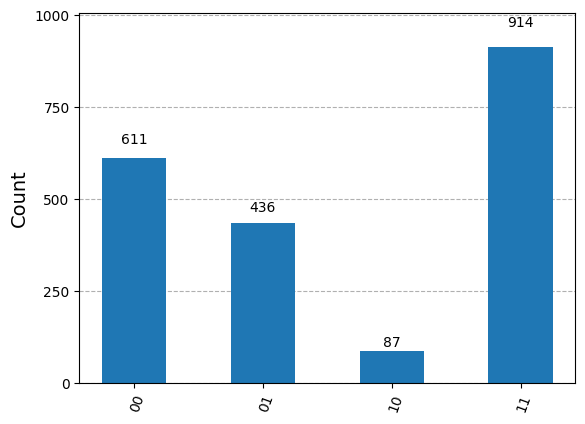

In [15]:
fig, ax = plt.subplots()

for i in range(10):
    ax.clear()
    plot_histogram(counts_dict[i], ax=ax)
    display(fig)
    sleep(1)
    clear_output()

# Task 15: Create the classical_step() Function
Create a function, classical_coin_toss, with the following specifications:

Parameters

x: The state of the classical walker. This is an int value.
Return value

r: Should return either 1 or -1 randomly with a probability of 0.5.

In [16]:
def classcial_step(x):
    r = np.random.binomial(1, 0.5)
    if r==0:
        r = -1       
    return  np.mod(x + r, 4)

# Task 16: Create the classical_random_walk() Function
Unlike a quantum walker, a classical walker can only be at one node at a certain step of the walk. Thus, we’ll store the result of a classical walk in a counter array, in which each array index will correspond to the number of times the walker visited that index. For instance, index 1 will indicate the number of times the classical walker visited the node 01.

Create a function, classical_random_walk(), with the following specifications:

Parameters

x: The state of the classical walker. This is an int value.
N: The number of steps. This is an int value.
Return value

x_vec: The step counter array. This array is of int type.

In [17]:
def classical_random_walk(x, N):
    '''
    x: The random variable
    N: Number of steps
    p = Probability of X = 1
    '''
    x_vec = np.zeros(4)
    for i in range(N):
        x = classcial_step(x)
        x_vec[x] += 1
    return x_vec

# Task 17: Test Run
Your task is to run the classical_random_walk() function for 100 walks and save the results in count_arr_classcial.

In [18]:
counts_classical = classical_random_walk(0, 100)


# Task 18: Analyze the Classical Random Walk
As the last step of the project, we will be looking into the scattering of the states of the classical and quantum random walker to observe any differences.

Calculate the standard deviation in the states of classical random walk by varying the steps linearly from 1 to 100. Use pyplot to plot the results.

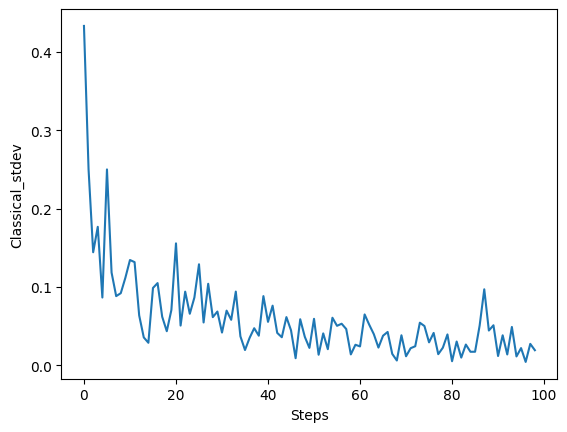

In [19]:
%matplotlib inline
std_mat_classical = []
for i in range(1, 100):
    y = classical_random_walk(0, i)
    std_mat_classical.append(np.std(y/i))
plt.plot(std_mat_classical)
plt.xlabel('Steps')
plt.ylabel('Classical_stdev')
plt.show()

# Task 19: Analyze the Quantum Random Walk
Calculate the standard deviation in the states of quantum random walk for N= 100. Use pyplot to plot the results.

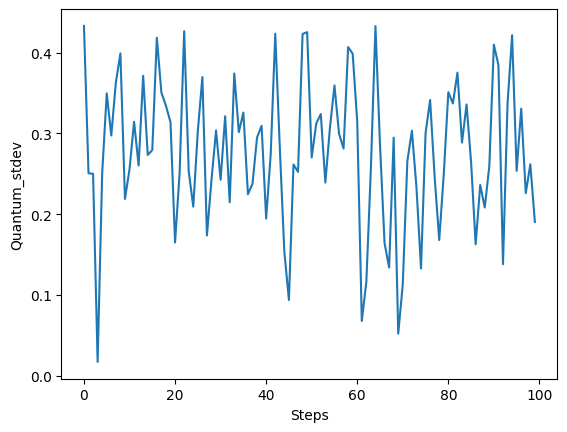

In [20]:
%matplotlib inline
counts_arr, _ = quantum_random_walk([1, 0, 0, 0], U, 100, backend)
std_mat_quantum = np.std(np.square(counts_arr), axis=1)
plt.plot(std_mat_quantum)
plt.xlabel('Steps')
plt.ylabel('Quantum_stdev')
plt.show()